# Methylation of Genomic Features

In [38]:
library(tidyverse)
library(dplyr)
library(rtracklayer)
library(tibble)

generate counts matrix for CG motifs, look for overlap with genomic features

we're looking at just where is methylation occuring in my samples

In [2]:
!CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences"

!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/CG_coverage/"

In [ ]:
!bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_coverage.csv

read in genomic features BED files

# Methylation level in gene features
I would like to know what percent of methylation is happening in exons/introns/etc. To do this, I'm going to use `bedtools multicov` to generate coverage files for each sample with bed files of the different gene features. Then, calculate the number of features with methylation and number without to get our methylation level.

In [1]:
!module load conda/latest

Removing conda
Loading conda


In [2]:
!conda activate bedtools


CondaError: Run 'conda init' before 'conda activate'



In [ ]:
!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/"
!exon_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_sorted_exon.bed"
!intron_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_sorted_intron.bed"
!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/"

In [ ]:
# hypoxic control
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

# control hypoxic
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

# hypoxic hypoxic 
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

# control control
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam") 


generate coverage file/counts matrix for each set of samples

## exons

In [ ]:
# for all samples
!bedtools multicov -bams /project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/*.bam -bed $exon_bed > ${output_dir}multicov_exon.csv

In [ ]:
# hypoxic control files
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

!bedtools multicov -bams "${HC_files[@]}" -bed $exon_bed > ${output_dir}HC_multicov_exon.csv

In [ ]:
# control hypoxic files
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

!bedtools multicov -bams "${CH_files[@]}" -bed $exon_bed > ${output_dir}CH_multicov_exon.csv

In [ ]:
# hypoxic hypoxic files
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

!bedtools multicov -bams "${HH_files[@]}" -bed $exon_bed > ${output_dir}HH_multicov_exon.csv

In [ ]:
# control control files
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

!bedtools multicov -bams "${CC_files[@]}" -bed $exon_bed > ${output_dir}CC_multicov_exon.csv

#### methylation level of exons

In [2]:
CC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_multicov_exon.csv", sep='\t')
CH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_multicov_exon.csv", sep='\t')
HC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_multicov_exon.csv", sep='\t')
HH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_multicov_exon.csv", sep='\t')

In [3]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_exon$avg_counts <- rowMeans(CC_exon[, tail(names(CC_exon), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_exon[CC_exon$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_exon <- dim(CC_filtered)[1]
total_exon <- dim(CC_exon)[1]
CC_level <- round((CCmethyl_exon/total_exon)*100, 2)

print(paste(CCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("methylation level of CC:", (CCmethyl_exon)/(total_exon)*100))

[1] "4526 methylated exons and 35645 total exons"
[1] "methylation level of CC: 12.6974330200589"


In [4]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_exon$avg_counts <- rowMeans(CH_exon[, tail(names(CH_exon), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_exon[CH_exon$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_exon <- dim(CH_filtered)[1]
total_exon <- dim(CH_exon)[1]
CH_level <- round((CHmethyl_exon/total_exon)*100, 2)

print(paste(CHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("methylation level of CH:", (CHmethyl_exon)/(total_exon)*100))

[1] "4338 methylated exons and 35645 total exons"
[1] "methylation level of CH: 12.170009819049"


In [5]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_exon$avg_counts <- rowMeans(HH_exon[, tail(names(HH_exon), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_exon[HH_exon$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_exon <- dim(HH_filtered)[1]
total_exon <- dim(HH_exon)[1]
HH_level <- round((HHmethyl_exon/total_exon)*100, 2)

print(paste(HHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("methylation level of HH:", (HHmethyl_exon)/(total_exon)*100))

[1] "4781 methylated exons and 35645 total exons"
[1] "methylation level of HH: 13.4128208724926"


In [6]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_exon$avg_counts <- rowMeans(HC_exon[, tail(names(HC_exon), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_exon[HC_exon$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_exon <- dim(HC_filtered)[1]
total_exon <- dim(HC_exon)[1]
HC_level <- round((HCmethyl_exon/total_exon)*100, 2)

print(paste(HCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("methylation level of HC:", (HCmethyl_exon)/(total_exon)*100))

[1] "4745 methylated exons and 35645 total exons"
[1] "methylation level of HC: 13.3118249403843"


In [7]:
exon_me_level <- tibble(CC = CC_level, HC = HC_level, HH = HH_level, CH = CH_level)
exon_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
12.7,13.31,13.41,12.17


In [8]:
exon_df <- exon_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

exon_df

ME_Level,Sample
<dbl>,<chr>
12.70,CC
13.31,HC
13.41,HH
12.17,CH


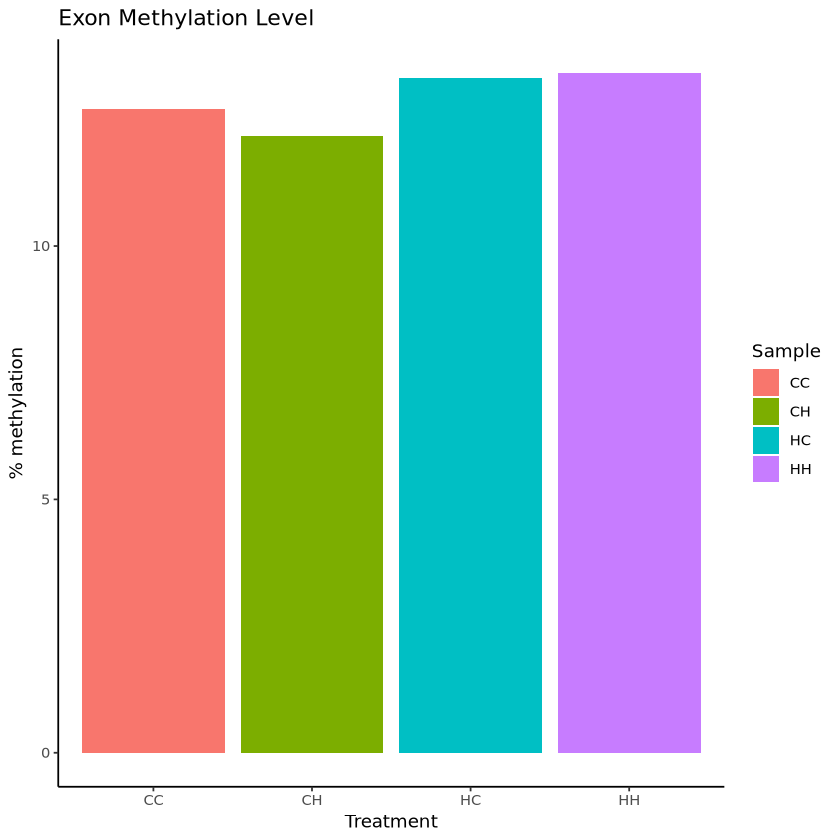

In [9]:
ggplot(exon_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
  labs(title = "Exon Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

#### introns

In [10]:
!bedtools multicov -bams /project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/*.bam -bed $intron > ${output_dir}multicov_intron.csv

ERROR: Error in parse(text = x, srcfile = src): <text>:1:11: unexpected symbol
1: !bedtools multicov
              ^


In [ ]:
# hypoxic control files
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

!bedtools multicov -bams "${HC_files[@]}" -bed $intron_bed > ${output_dir}HC_multicov_intron.csv

In [ ]:
# control hypoxic files
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

!bedtools multicov -bams "${CH_files[@]}" -bed $intron_bed > ${output_dir}CH_multicov_intron.csv

In [ ]:
# hypoxic hypoxic files
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

!bedtools multicov -bams "${HH_files[@]}" -bed $intron_bed > ${output_dir}HH_multicov_intron.csv

In [ ]:
# control control files
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

!bedtools multicov -bams "${CC_files[@]}" -bed $intron_bed > ${output_dir}CC_multicov_intron.csv

#### methylation level of introns

In [11]:
CC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_multicov_intron.csv", sep='\t')
CH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_multicov_intron.csv", sep='\t')
HC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_multicov_intron.csv", sep='\t')
HH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_multicov_intron.csv", sep='\t')

In [13]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_intron$avg_counts <- rowMeans(CC_intron[, tail(names(CC_intron), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_intron[CC_intron$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_intron <- dim(CC_filtered)[1]
total_intron <- dim(CC_intron)[1]
CC_level_intron <- round((CCmethyl_intron/total_intron)*100, 2)

print(paste(CCmethyl_intron, "methylated exons and", total_intro, "total exons"))
print(paste("methylation level of CC:", (CCmethyl_intron)/(total_intro)*100))

[1] "618 methylated exons and 16399 total exons"
[1] "methylation level of CC: 3.76852247088237"


In [14]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_intron$avg_counts <- rowMeans(CH_intron[, tail(names(CH_intron), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_intron[CH_intron$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_intron <- dim(CH_filtered)[1]
total_intron <- dim(CH_intron)[1]
CH_level_intron <- round((CHmethyl_intron/total_intron)*100, 2)

print(paste(CHmethyl_intron, "methylated exons and", total_intron, "total exons"))
print(paste("methylation level of CH:", (CHmethyl_intron)/(total_intron)*100))

[1] "711 methylated exons and 16399 total exons"
[1] "methylation level of CH: 4.33563022135496"


In [15]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_intron$avg_counts <- rowMeans(HH_intron[, tail(names(HH_intron), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_intron[HH_intron$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_intron <- dim(HH_filtered)[1]
total_intron <- dim(HH_intron)[1]
HH_level_intron <- round((HHmethyl_intron/total_intron)*100, 2)

print(paste(HHmethyl_intron, "methylated exons and", total_intron, "total exons"))
print(paste("methylation level of HH:", (HHmethyl_intron)/(total_intron)*100))

[1] "821 methylated exons and 16399 total exons"
[1] "methylation level of HH: 5.00640282944082"


In [16]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_intron$avg_counts <- rowMeans(HC_intron[, tail(names(HC_intron), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_intron[HC_intron$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_intron <- dim(HC_filtered)[1]
total_intron <- dim(HC_intron)[1]
HC_level_intron <- round((HCmethyl_intron/total_intron)*100, 2)

print(paste(HCmethyl_intron, "methylated exons and", total_intron, "total exons"))
print(paste("methylation level of HC:", (HCmethyl_intron)/(total_intron)*100))

[1] "896 methylated exons and 16399 total exons"
[1] "methylation level of HC: 5.46374778949936"


In [17]:
intron_me_level <- tibble(CC = CC_level_intron, HC = HC_level_intron, HH = HH_level_intron, CH = CH_level_intron)
intron_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
3.77,5.46,5.01,4.34


In [18]:
intron_df <- intron_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

intron_df

ME_Level,Sample
<dbl>,<chr>
3.77,CC
5.46,HC
5.01,HH
4.34,CH


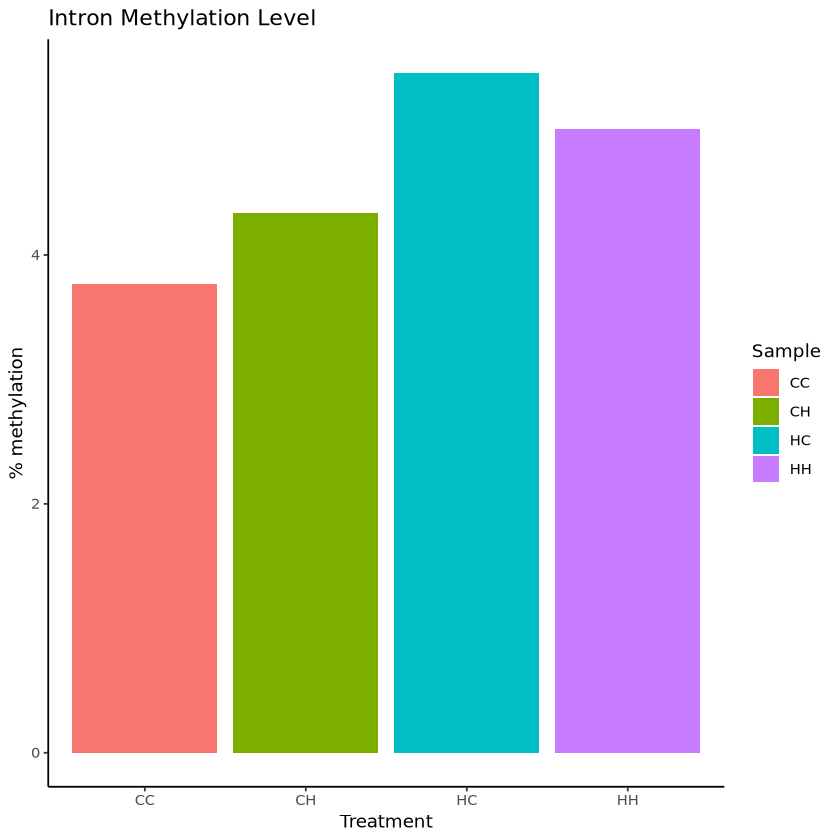

In [19]:
ggplot(intron_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
  labs(title = "Intron Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

# CG motif

In [20]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CG_motif_multicov.csv', sep='\t')
dim(CG_multicov)
head(CG_multicov)

[1] 14458702       24

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

In [22]:
# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [23]:
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
# Base columns
base_cols <- CG_multicov[, c("chromosome", "start", "stop", "CG_motif")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- CG_multicov[, grepl("BB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

write.csv(HC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_CpGmulticov.csv")

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- CG_multicov[, grepl("BB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

write.csv(HH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_CpGmulticov.csv")

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- CG_multicov[, grepl("WB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

write.csv(CH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_CpGmulticov.csv")

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- CG_multicov[, grepl("WB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

write.csv(CC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_CpGmulticov.csv")

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


## calculate *overall* methylation level

(number of methylated CG)/(total CG)

methylated CG being those that have an average of 5 sequences over the 5 sample replicates

**CONTROL CONTROL**

In [25]:
# Calculate average counts of last 5 columns
CC_multicov$avg_counts <- rowMeans(CC_multicov[, tail(names(CC_multicov), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_multicov[CC_multicov$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL


############## methylation level ##############
CC_CGmethyl <- dim(CC_filtered)[1]
total_CG <- dim(CC_multicov)[1]

CCpercent_me <- round((CC_CGmethyl/total_CG)*100,2)
print(paste(CCpercent_me, "% CpG dinucleotide methylation"))


[1] "0.74 % CpG dinucleotide methylation"


**CONTROL HYPOXIC**

In [26]:
# Calculate average counts of last 5 columns
CH_multicov$avg_counts <- rowMeans(CH_multicov[, tail(names(CH_multicov), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_multicov[CH_multicov$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL


############## methylation level ##############
CH_CGmethyl <- dim(CH_filtered)[1]
total_CG <- dim(CH_multicov)[1]

CHpercent_me <- round((CH_CGmethyl/total_CG)*100,2)
print(paste(CHpercent_me, "% CpG dinucleotide methylation"))


[1] "0.77 % CpG dinucleotide methylation"


**HYPOXIC HYPOXIC**

In [27]:
# Calculate average counts of last 5 columns
HH_multicov$avg_counts <- rowMeans(HH_multicov[, tail(names(HH_multicov), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_multicov[HH_multicov$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL


############## methylation level ##############
HH_CGmethyl <- dim(HH_filtered)[1]
total_CG <- dim(HH_multicov)[1]

HHpercent_me <- round((HH_CGmethyl/total_CG)*100,2)
print(paste(HHpercent_me, "% CpG dinucleotide methylation"))


[1] "0.9 % CpG dinucleotide methylation"


**HYPOXIC CONTROL**

In [28]:
# Calculate average counts of last 5 columns
HC_multicov$avg_counts <- rowMeans(HC_multicov[, tail(names(HC_multicov), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_multicov[HC_multicov$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL


############## methylation level ##############
HC_CGmethyl <- dim(HC_filtered)[1]
total_CG <- dim(HC_multicov)[1]

HCpercent_me <- round((HC_CGmethyl/total_CG)*100,2)
print(paste(HCpercent_me, "% CpG dinucleotide methylation"))


[1] "1 % CpG dinucleotide methylation"


In [29]:
CpG_methyl <- tibble(
    cont_hyp = CHpercent_me,
    hyp_hyp = HHpercent_me,
    hyp_cont = HCpercent_me,
    cont_cont = CCpercent_me)

CpG_methyl <- CpG_methyl %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("percent_me")) %>%  # rename the single column
  mutate(treatment = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

CpG_methyl

percent_me,treatment
<dbl>,<chr>
0.77,cont_hyp
0.90,hyp_hyp
1.00,hyp_cont
0.74,cont_cont


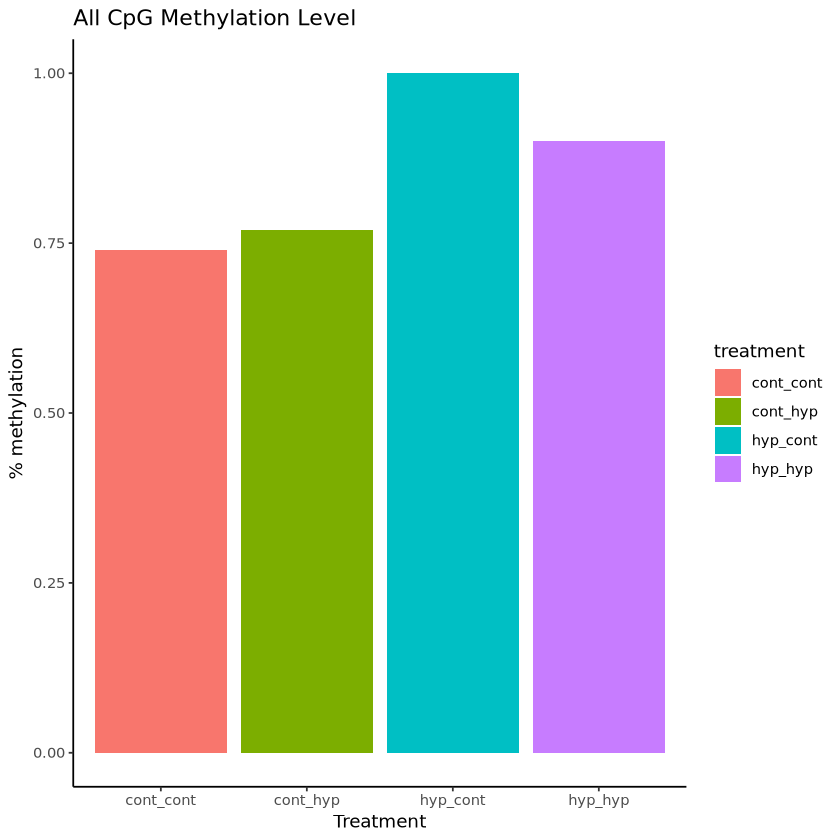

In [34]:
ggplot(CpG_methyl, aes(x = treatment, y = percent_me, fill = treatment)) +
  geom_bar(stat = "identity") +
  labs(title = "All CpG Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

In [30]:
cont <- c(CHpercent_me, CCpercent_me)
hyp <- c(HHpercent_me, HCpercent_me)

t.test(cont, hyp)


	Welch Two Sample t-test

data:  cont and hyp
t = -3.7355, df = 1.1786, p-value = 0.1363
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6621801  0.2721801
sample estimates:
mean of x mean of y 
    0.755     0.950 


### overlap of methylated CpG with gene features

run in command line:

In [31]:
# gene feature BED files
exonList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_Gnomon_exon_sorted_yrv.bed"
intronList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_Gnomon_intron_yrv.bed"
utrList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_Gnomon_exonUTR_yrv.bed"
promoterList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/2019-05-29-mRNA-Promoter-Track.bed"
intergenicList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_Gnomon_intergenic_yrv.bed"
teList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_TE-all.gff"
geneList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_Gnomon_gene_sorted_yrv.bed"
noncodingList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_Gnomon_noncoding_yrv.bed"

# CpG dinucleotide list and output directory
cpgList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CpG_overlap/"

**all CpG dinucleotides** 

In [ ]:
bedtools intersect -u -a $cpgList -b $geneList | wc -l
echo "total CpG dinucleotides in genes"

7914103 CpG motifs overlap with genes

In [ ]:
bedtools intersect -u -a $cpgList -b $exonList | wc -l
echo "total CpG dinucleotides in exons"

2323389 CpG motifs overlap with exons

In [ ]:
bedtools intersect -u -a $cpgList -b $intronList | wc -l
echo "total CpG dinucleotides in introns"

5596808 CpG motifs overlap with introns

In [ ]:
bedtools intersect -u -a $cpgList -b $utrList | wc -l
echo "total CpG dinucleotides in UTRs"

600840 CpG motifs overlap with exon UTRs

In [ ]:
bedtools intersect -u -a $cpgList -b $promoterList | wc -l
echo "total CpG dinucleotides in putative promoters"

926518 CpG motifs overlap with putative promoters

In [ ]:
bedtools intersect -u -a $cpgList -b $intergenicList | wc -l
echo "total CpG dinucleotides in intergenic regions"

6545363 CpG motifs overlap with intergenic regions

In [ ]:
bedtools intersect -u -a $cpgList -b $noncodingList | wc -l
echo "total CpG dinucleotides in non-coding regions"

12142171 CpG motifs overlap with non-coding regions

In [ ]:
bedtools intersect -u -a $cpgList -b $teList | wc -l
echo "total CpG dinucleotides in transposable elements"

2828372 CpG motifs overlap with intergenic regions

#### methylated CpG by treatment

first, filtering treatment CpG motifs - a CpG dinucleotide is considered methylated if the average count across the four replicates is greater than or equal to 4. This ensures that we're not counting a CpG methylated if one sample has a count of 15 and the rest have 0.

In [46]:
# Calculate average counts of last 5 columns
CH_multicov$avg_counts <- rowMeans(CH_multicov[, tail(names(CH_multicov), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_multicov[CH_multicov$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CH_bed <- select(CH_filtered, chromosome, start, stop)
rownames(CH_bed) <- NULL
head(CH_bed)

write.table(CH_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,23615,23617
2,NC_035780.1,23620,23622
3,NC_035780.1,23624,23626
4,NC_035780.1,23631,23633
5,NC_035780.1,23638,23640
6,NC_035780.1,198167,198169


In [45]:
# Calculate average counts of last 5 columns
CC_multicov$avg_counts <- rowMeans(CC_multicov[, tail(names(CC_multicov), 5)])

# Remove rows with averages below 5
CC_filtered <- CH_multicov[CC_multicov$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CC_bed <- select(CC_filtered, chromosome, start, stop)
rownames(CC_bed) <- NULL
head(CC_bed)

write.table(CC_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,23615,23617
2,NC_035780.1,23620,23622
3,NC_035780.1,23624,23626
4,NC_035780.1,23631,23633
5,NC_035780.1,23638,23640
6,NC_035780.1,162717,162719


In [47]:
# Calculate average counts of last 5 columns
HH_multicov$avg_counts <- rowMeans(HH_multicov[, tail(names(HH_multicov), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_multicov[HH_multicov$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HH_bed <- select(HH_filtered, chromosome, start, stop)
rownames(HH_bed) <- NULL
head(HH_bed)

write.table(HH_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,17176,17178
2,NC_035780.1,20142,20144
3,NC_035780.1,20149,20151
4,NC_035780.1,20157,20159
5,NC_035780.1,20170,20172
6,NC_035780.1,23584,23586


In [48]:
# Calculate average counts of last 5 columns
HC_multicov$avg_counts <- rowMeans(HC_multicov[, tail(names(HC_multicov), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_multicov[HC_multicov$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HC_bed <- select(HC_filtered, chromosome, start, stop)
rownames(HC_bed) <- NULL
head(HC_bed)

write.table(HC_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,17176,17178
2,NC_035780.1,20142,20144
3,NC_035780.1,20149,20151
4,NC_035780.1,20157,20159
5,NC_035780.1,20170,20172
6,NC_035780.1,23615,23617


In [49]:
# CpG lists for each treatment
CC_CpG="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_cpgMethyl.bed"
CH_CpG="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_cpgMethyl.bed"
HC_CpG="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_cpgMethyl.bed"
HH_CpG="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_cpgMethyl.bed"

**methylated CpG in genes**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $geneList | wc -l
echo "methylated CpG for cont cont overlaps with genes"

bedtools intersect -u -a $CH_CpG -b $geneList | wc -l
echo "methylated CpG for cont hyp overlaps with genes"

bedtools intersect -u -a $HC_CpG -b $geneList | wc -l
echo "methylated CpG for hyp cont overlaps with genes"

bedtools intersect -u -a $HH_CpG -b $geneList | wc -l
echo "methylated CpG for hyp hyp overlaps with genes"

76332 methylated CpG for cont cont overlaps with genes

79389 methylated CpG for cont hyp overlaps with genes

109723 methylated CpG for hyp cont overlaps with genes

100466 methylated CpG for hyp hyp overlaps with genes

**methylated CpG in exons**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $exonList | wc -l
echo "methylated CpG for cont cont overlaps with exons"

bedtools intersect -u -a $CH_CpG -b $exonList | wc -l
echo "methylated CpG for cont hyp overlaps with exons"

bedtools intersect -u -a $HC_CpG -b $exonList | wc -l
echo "methylated CpG for hyp cont overlaps with exons"

bedtools intersect -u -a $HH_CpG -b $exonList | wc -l
echo "methylated CpG for hyp hyp overlaps with exons"

51404 methylated CpG for cont cont overlaps with exons

52447 methylated CpG for cont hyp overlaps with exons

67132 methylated CpG for hyp cont overlaps with exons

63270 methylated CpG for hyp hyp overlaps with exons


genes**methylated CpG in introns**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $intronList | wc -l
echo "methylated CpG for cont cont overlaps with introns"

bedtools intersect -u -a $CH_CpG -b $intronList | wc -l
echo "methylated CpG for cont hyp overlaps with introns"

bedtools intersect -u -a $HC_CpG -b $intronList | wc -l
echo "methylated CpG for hyp cont overlaps with introns"

bedtools intersect -u -a $HH_CpG -b $intronList | wc -l
echo "methylated CpG for hyp hyp overlaps with introns"

24954 methylated CpG for cont cont overlaps with introns

26971 methylated CpG for cont hyp overlaps with introns

42627 methylated CpG for hyp cont overlaps with introns

37225 methylated CpG for hyp hyp overlaps with introns

**methylated CpG in putative promoters**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $promoterList | wc -l
echo "methylated CpG for cont cont overlaps with promoters"

bedtools intersect -u -a $CH_CpG -b $promoterList | wc -l
echo "methylated CpG for cont hyp overlaps with promoters"

bedtools intersect -u -a $HC_CpG -b $promoterList | wc -l
echo "methylated CpG for hyp cont overlaps with promoters"

bedtools intersect -u -a $HH_CpG -b $promoterList | wc -l
echo "methylated CpG for hyp hyp overlaps with promoters"

2816 methylated CpG for cont cont overlaps with promoters

3271 methylated CpG for cont hyp overlaps with promoters

5399 methylated CpG for hyp cont overlaps with promoters

4674 methylated CpG for hyp hyp overlaps with promoters

**methylated CpG in exon UTRs**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $utrList | wc -l
echo "methylated CpG for cont cont overlaps with UTRs"

bedtools intersect -u -a $CH_CpG -b $utrList | wc -l
echo "methylated CpG for cont hyp overlaps with UTRs"

bedtools intersect -u -a $HC_CpG -b $utrList | wc -l
echo "methylated CpG for hyp cont overlaps with UTRs"

bedtools intersect -u -a $HH_CpG -b $utrList | wc -l
echo "methylated CpG for hyp hyp overlaps with UTRs"

3725 methylated CpG for cont cont overlaps with UTRs

3828 methylated CpG for cont hyp overlaps with UTRs

5024 methylated CpG for hyp cont overlaps with UTRs

4693 methylated CpG for hyp hyp overlaps with UTRs

**methylated CpG in transposable elements**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $teList | wc -l
echo "methylated CpG for cont cont overlaps with TEs"

bedtools intersect -u -a $CH_CpG -b $teList | wc -l
echo "methylated CpG for cont hyp overlaps with TEs"

bedtools intersect -u -a $HC_CpG -b $teList | wc -l
echo "methylated CpG for hyp cont overlaps with TEs"

bedtools intersect -u -a $HH_CpG -b $teList | wc -l
echo "methylated CpG for hyp hyp overlaps with TEs"

13950 methylated CpG for cont cont overlaps with TEs

15377 methylated CpG for cont hyp overlaps with TEs

23916 methylated CpG for hyp cont overlaps with TEs

21942 methylated CpG for hyp hyp overlaps with TEs

**methylated CpG in intergenic regions**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $intergenicList | wc -l
echo "methylated CpG for cont cont overlaps with intergenic regions"

bedtools intersect -u -a $CH_CpG -b $intergenicList | wc -l
echo "methylated CpG for cont hyp overlaps with intergenic regions"

bedtools intersect -u -a $HC_CpG -b $intergenicList | wc -l
echo "methylated CpG for hyp cont overlaps with intergenic regions"

bedtools intersect -u -a $HH_CpG -b $intergenicList | wc -l
echo "methylated CpG for hyp hyp overlaps with intergenic regions"

15299 methylated CpG for cont cont overlaps with intergenic regions

17700 methylated CpG for cont hyp overlaps with intergenic regions

31254 methylated CpG for hyp cont overlaps with intergenic regions

26340 methylated CpG for hyp hyp overlaps with intergenic regions